In [6]:
import pandas as pd
import openpyxl
import os
import glob
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
file_path = Path("intermediate_tables") / "parquet_files" / "processed_weather_and_crop_data.parquet"
file_path.resolve()
df_centralised = pd.read_parquet(file_path, engine='pyarrow')

df_centralised.columns

Index(['Year', 'Name', 'State', 'RegionName', 'SiteDescription', 'TrialCode',
       'SowingDate', 'HarvestDate', 'Abandoned', 'CultivarID',
       'GrainYield_gm2', 'T.Max_avg', 'T.Min_avg', 'Rain_avg', 'Evap_avg',
       'Radn_avg', 'VP_avg', 'RHmaxT_avg', 'RHminT_avg'],
      dtype='object')

In [4]:
df_centralised.shape

(32493, 54)

In [10]:
df_centralised.columns

Index(['Year', 'Name', 'State', 'RegionName', 'SiteDescription', 'TrialCode',
       'SowingDate', 'HarvestDate', 'Abandoned', 'CultivarID',
       'GrainYield_gm2', 'T.Max_avg', 'T.Min_avg', 'Rain_avg', 'Evap_avg',
       'Radn_avg', 'VP_avg', 'RHmaxT_avg', 'RHminT_avg'],
      dtype='object')

In [11]:
df_centralised['GrainYield_gm2']

0         422.902494
1         342.403628
2         408.491107
3         392.290249
4         349.579832
             ...    
110182    330.714286
110183    370.000000
110184    334.285714
110185    381.428571
110186    286.428571
Name: GrainYield_gm2, Length: 110187, dtype: float64

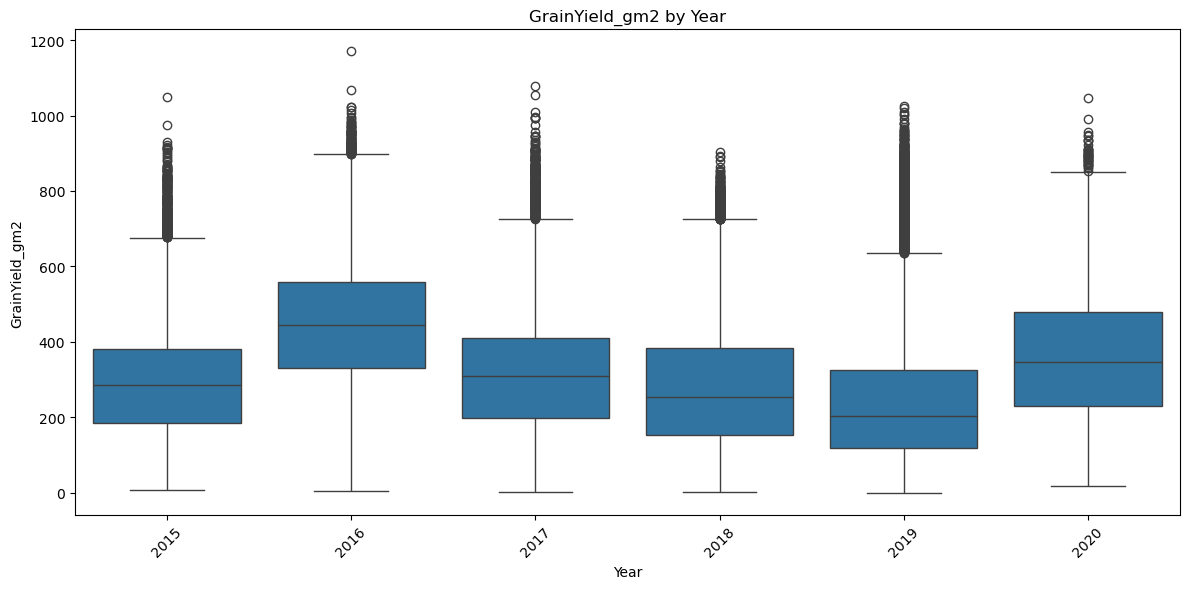

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_centralised, x='Year', y='GrainYield_gm2')
plt.title('GrainYield_gm2 by Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

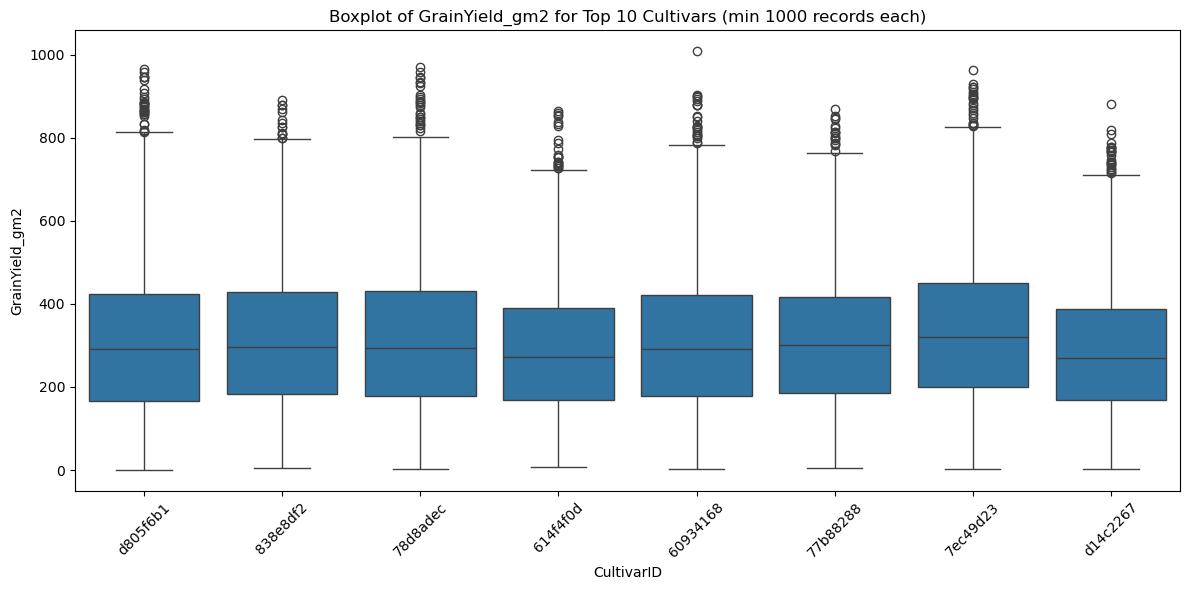

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
# df = pd.read_csv("your_data.csv")

# Step 1: Filter out cultivars with fewer than 10 records
cultivar_counts = df_centralised['CultivarID'].value_counts()
valid_cultivars = cultivar_counts[cultivar_counts >= 1500].index
df_filtered = df_centralised[df_centralised['CultivarID'].isin(valid_cultivars)]

# Step 2: Compute mean Kg/Plot per cultivar, get top 10
top10_cultivars = (
    df_filtered.groupby('CultivarID')['GrainYield_gm2']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .index
)


# Step 3: Keep only top 10 cultivars
df_top10 = df_filtered[df_filtered['CultivarID'].isin(top10_cultivars)]

df_top10.head()
# Step 4: Create box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top10, x='CultivarID', y='GrainYield_gm2')
plt.title('Boxplot of GrainYield_gm2 for Top 10 Cultivars (min 1000 records each)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [26]:
import category_encoders as ce
# Create a target encoder
target_encoder = ce.TargetEncoder(cols=['CultivarID'])

# Fit and transform the 'CultivarID' column using the target encoder
df_centralised['CultivarID_encoded'] = target_encoder.fit_transform(df_centralised['CultivarID'], df_centralised['GrainYield_gm2'])

df_centralised.head()

,Year,Name,State,RegionName,SiteDescription,TrialCode,SowingDate,HarvestDate,Abandoned,CultivarID,GrainYield_gm2,T.Max_avg,T.Min_avg,Rain_avg,Evap_avg,Radn_avg,VP_avg,RHmaxT_avg,RHminT_avg,CultivarID_encoded
0,2015,Wheat,NSW,N/E,Bellata,trial_719,2015-05-19,2015-11-24,False,ea9c07b5,422.902494,23.106316,8.787368,1.433684,4.128421,16.717895,11.624737,42.42,91.931053,451.602726
1,2015,Wheat,NSW,N/E,Bellata,trial_719,2015-05-19,2015-11-24,False,cd19a3a0,342.403628,23.106316,8.787368,1.433684,4.128421,16.717895,11.624737,42.42,91.931053,381.201524
2,2015,Wheat,NSW,N/E,Bellata,trial_719,2015-05-19,2015-11-24,False,e7cf3b4d,408.491107,23.106316,8.787368,1.433684,4.128421,16.717895,11.624737,42.42,91.931053,361.639418
3,2015,Wheat,NSW,N/E,Bellata,trial_719,2015-05-19,2015-11-24,False,41230145,392.290249,23.106316,8.787368,1.433684,4.128421,16.717895,11.624737,42.42,91.931053,491.115446
4,2015,Wheat,NSW,N/E,Bellata,trial_719,2015-05-19,2015-11-24,False,201d5469,349.579832,23.106316,8.787368,1.433684,4.128421,16.717895,11.624737,42.42,91.931053,382.463309


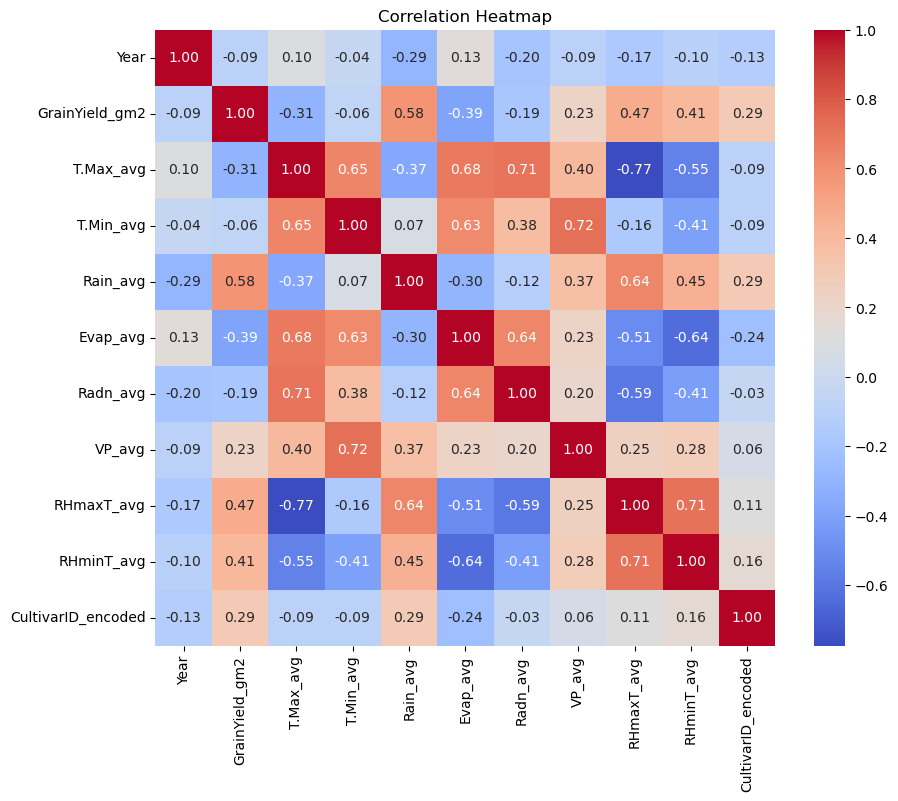

In [27]:
#do correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

numeric_df = df_centralised.select_dtypes(include=['float64', 'int64'])

#numeric_df.drop(columns=['Soil_Released', 'Soil_Year', 'Srn_avg','Sev_avg', 'Ssl_avg', 'Svp_avg', 'Year', 'Soil_SoilTestID'], inplace=True)
#part1 = numeric_df.iloc[:, :int(numeric_df.shape[1] / 2)]
part2 = numeric_df.iloc[:, int(numeric_df.shape[0] / 2):]

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()
#correlation_matrix = part1.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


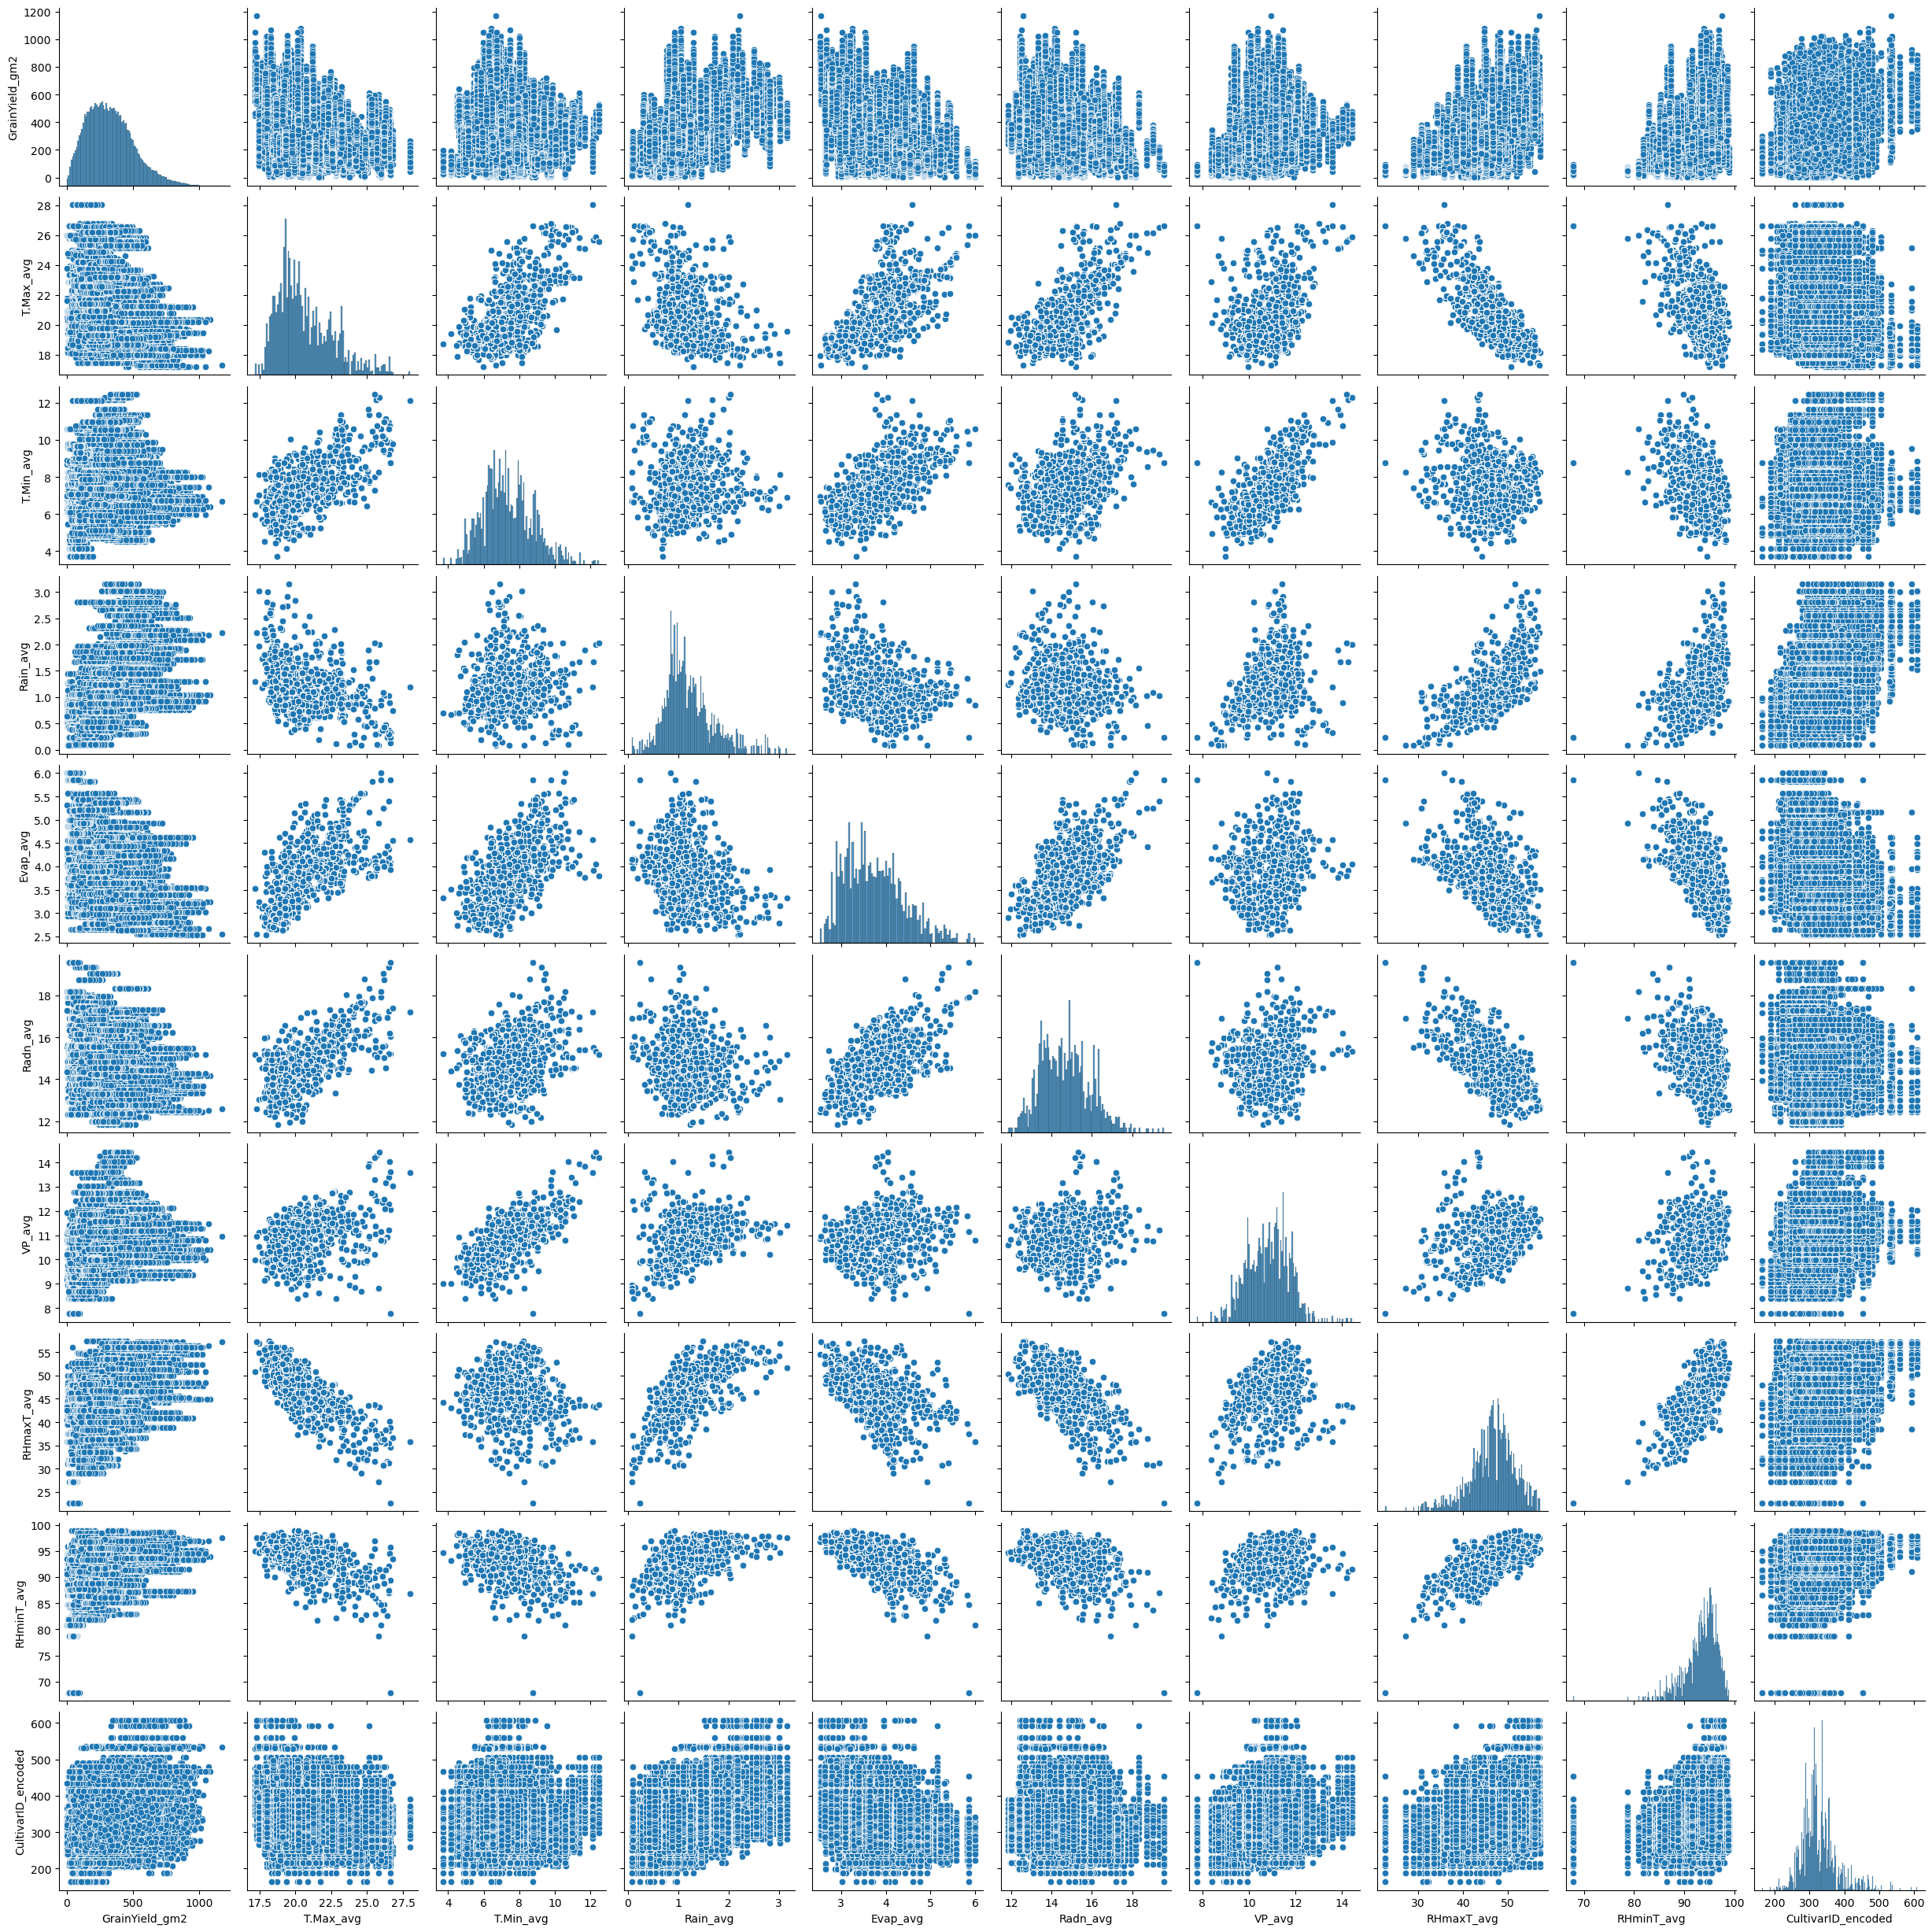

In [31]:
selected_cols = ['T.Max_avg', 'T.Min_avg', 'Rain_avg', 'Evap_avg',
                 'Radn_avg', 'VP_avg', 'RHmaxT_avg', 'RHminT_avg', 'GrainYield_gm2', 'CultivarID_encoded']

df_pair = df_centralised.drop(columns=['Abandoned', 'Year'])
sns.pairplot(df_pair)
plt.show()